# Kernelized Support Vector Machine

Kernelized Support Vector Machines (SVMs) are an extension of the standard SVMs that allow for more complex, non-linear decision boundaries.

## Key Concepts

- **Support Vector Machine (SVM)**: A supervised learning algorithm used for classification or regression tasks. It works by finding the optimal hyperplane that separates different classes with the maximum margin, which is the distance between the hyperplane and the nearest data points from each class.

- **Hyperplane**: In SVM, a hyperplane is a decision boundary that separates data points of different classes. In two-dimensional space, this is a line, but in higher dimensions, it's a plane or a hyper-surface.

- **Margin**: The margin is the distance between the hyperplane and the closest data points from each class. SVM aims to maximize this margin to improve the model's generalization ability.

- **Kernel Trick**: The kernel trick involves mapping data into a higher-dimensional space to make it possible to find a linear separation between classes that are not linearly separable in the original space. This is done using a kernel function, which computes the similarity between data points.

- **Kernel Functions**: These are mathematical functions used in the kernel trick. They transform the training set of data so that a non-linear decision surface can be transformed into a linear equation in a higher number of dimension spaces. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

- **Non-linearly Separable Data**: Data that cannot be separated by a straight line or a flat hyperplane in the original feature space. Kernelized SVMs can handle such data by using the kernel trick to project it into a higher-dimensional space where it becomes linearly separable.

## Non-linearlly Separable Data

- Linear models are quite limited in low-dimensional spaces, as lines and hyperplanes have low flexibility.
- One way to make a linear model more flexible is by adding more features, such as polynomial features.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

Text(0, 0.5, 'Feature 1')

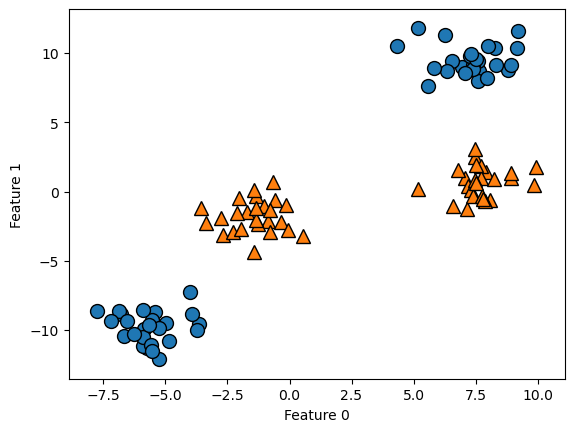

In [43]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2 # make the problem harder by using only two classes

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

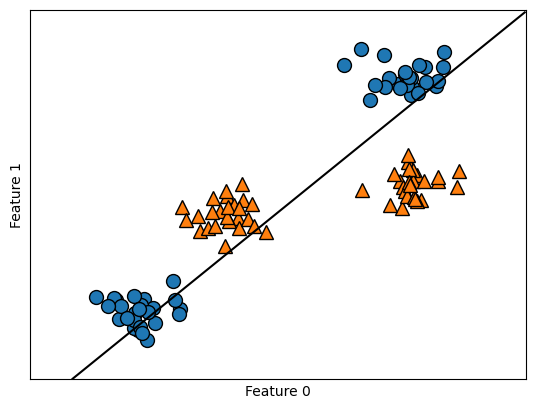

In [44]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- Linear SVM separates classes using a straight line. -> Limitation

Add `feature1 ** 2`, as a new feature.

- (`feature1`, `feature2`) -> (`feature1`, `feature2`, `feature1 ** 2`) : 3D space

/var/folders/4_/11zd5rrn2d58rmlfjj39rclh0000gn/T/ipykernel_98388/3776087926.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
/var/folders/4_/11zd5rrn2d58rmlfjj39rclh0000gn/T/ipykernel_98388/3776087926.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)


Text(0.5, 0, 'feature1 ** 2')

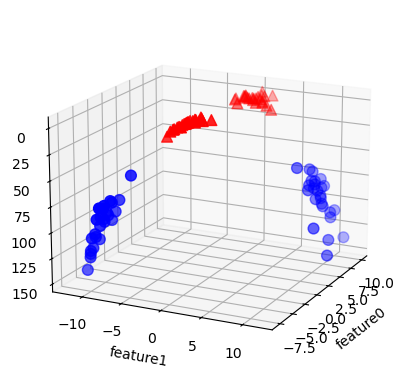

In [69]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = figure.add_subplot(projection='3d', elev=-163, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/4_/11zd5rrn2d58rmlfjj39rclh0000gn/T/ipykernel_98388/559072481.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
/var/folders/4_/11zd5rrn2d58rmlfjj39rclh0000gn/T/ipykernel_98388/559072481.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)


Text(0.5, 0, 'feature1 ** 2')

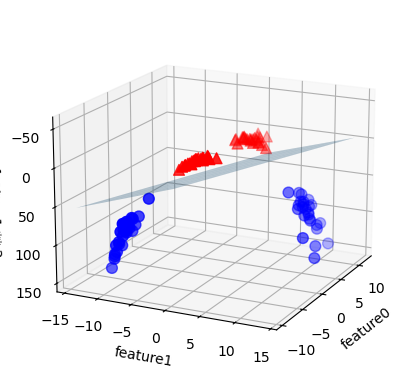

In [70]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = figure.add_subplot(projection='3d', elev=-163, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

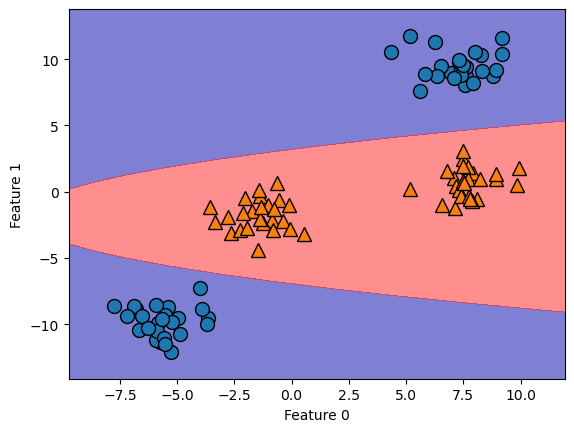

In [71]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- The decision function is not linear anymore.

## The Kernel Trick

- Adding nonlinear features can make linear models more flexible.
    - Don't know which features to add.
    - Adding many features might make computation very expensive.

**Kernel Trick**: A mathematical technique that allows model to learn in a higher-dimensional space without actually computing the new higher-dimensional representation.

- The kernel trick works by directly computing the distance between the points in the higher-dimensional space.
- This is achieved by using a kernel function that measures the similarity between two samples:
$$
K(x, x') = \phi(x) \cdot \phi(x')
$$

where:
- $K$ is the kernel function.
- $x$ and $x'$ are the samples.
- $\phi$ is the transformation function that maps samples to a higher-dimensional space.

### Common Kernel Functions

- **Linear Kernel**: $K(x, x') = x \cdot x'$
    - No transformation.
    - Just the dot product of the original samples.
- **Polynomial Kernel**: $K(x, x') = (x \cdot x' + c)^d$
    - Transforms data into polynomial features.
    - $c$ is a constant term.
    - $d$ is the degree of the polynomial.
- **Radial Basis Function (RBF) Kernel**: $K(x, x') = \exp(-\gamma ||x - x'||^2)$
    - Transforms data into an infinite-dimensional space.
    - $\gamma$ is a hyperparameter.
- **Sigmoid Kernel**: $K(x, x') = \tanh(\alpha x \cdot x' + c)$
    - Transforms data using the hyperbolic tangent function.
    - $\alpha$ and $c$ are hyperparameters.

## Understanding SVMs

During training, SVM learns importance of each training example in defining the decision boundary.
- **Support Vectors**: Training examples that influence the decision boundary.
    - These are the points closest to the decision boundary.
    - They are the most informative examples for the model.
- **Margin**: The distance between the decision boundary and the closest training examples.
    - SVM tries to maximize this margin.
    - This helps the model generalize better to unseen data.

To make a prediction for a new point, 
1. The distance to each of the support vectors is measured.
2. The model makes a prediction based on these distances and the importance of the support vectors learned during training (stored in the `dual_coef_` attribute).

The distance between data points is computed using the kernel function. In this case, the RBF kernel:
$$
K_{rbf}(x_1, x_2) = \exp(-\gamma ||x_1 - x_2||^2)
$$

where:
- $x_1$ and $x_2$ are the data points.
- $||x_1 - x_2||$ is the Euclidean distance between the points.
- $\gamma$ is a hyperparameter that controls the width of the Gaussian.

Text(0, 0.5, 'Feature 1')

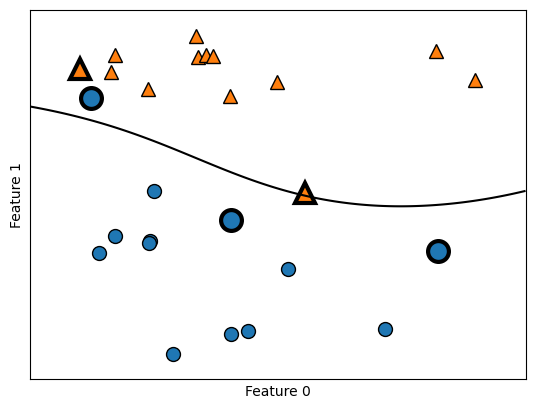

In [72]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- Support vectors are larger points in the plot.
- The SVM yields a smooth and non-linear decision boundary.

## Hyperparameters

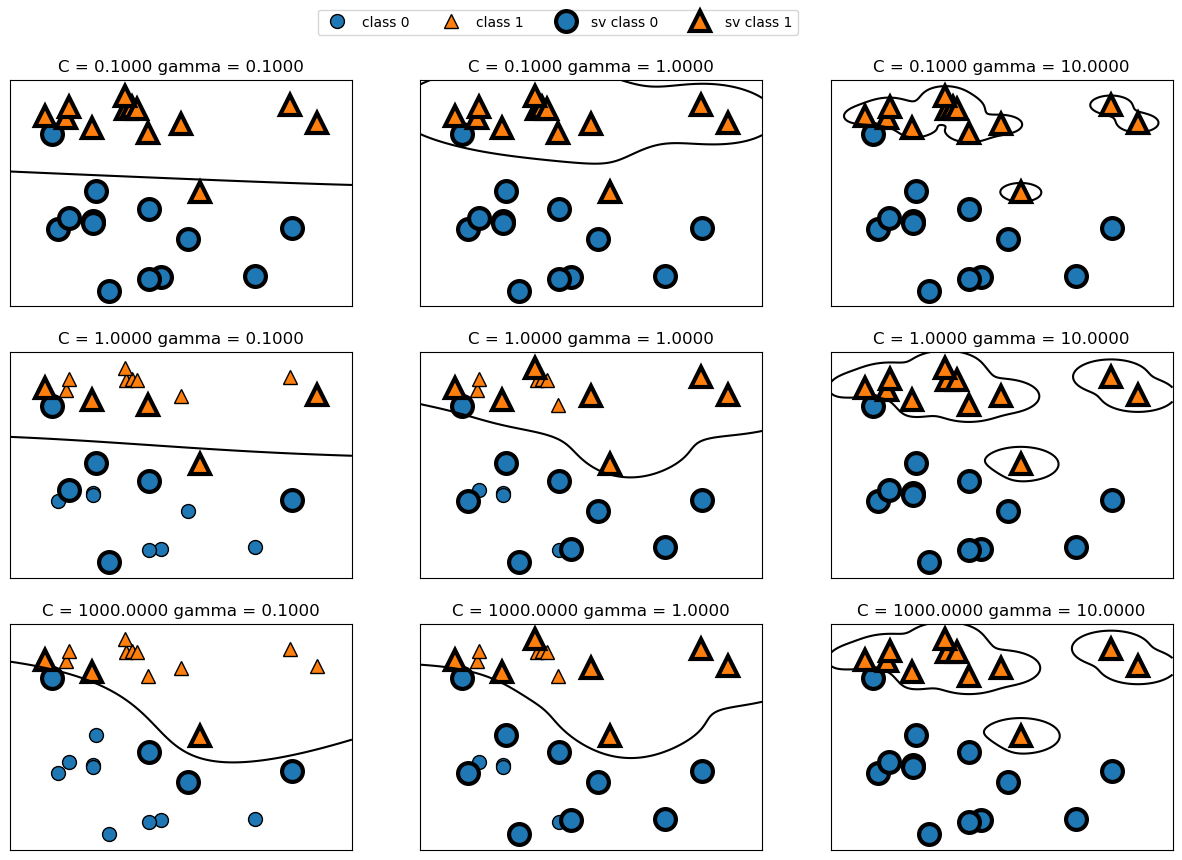

In [73]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0",
                  "sv class 1"], ncol=4, loc=(.9, 1.2))

Left to right: $\gamma$ = 0.001, 1, 10

Top to bottom: $C$ = 0.1, 100, 1000


- **Gamma ($\gamma$)**: Controls the width of the Gaussian kernel.
    - Determines the scale of what is means for points to be close together.
    - Small $\gamma$ means points are consideredy close by.
    -> Leads to a smooth decision boundary.
    -> Less complex model.
    - Large $\gamma$ means points have to be very close to be considered similar.
    -> Leads to a more complex decision boundary.

- **C**: Regularization parameter.
    - Limits the importance of each point.
    - Small `C` makes each data point have a small impact on the decision boundary.
    -> Leads to a smooth decision boundary.
    - Large `C` aims at classifying all training examples correctly.
    -> Leads to a more complex decision boundary.

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

n_features = cancer.data.shape[1]

svc = SVC(C=1, gamma = 1/n_features)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


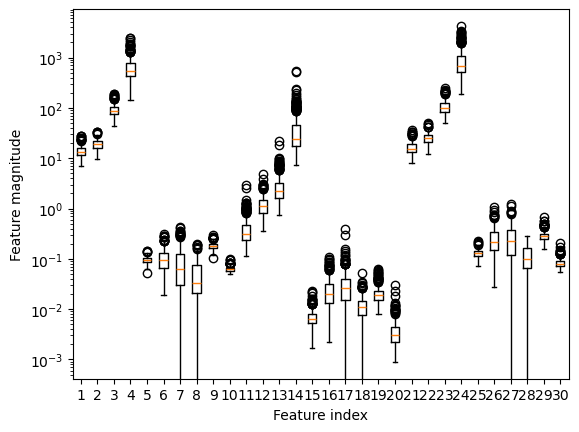

In [83]:
plt.boxplot(X_train)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")


- SVMs are very sensitive to the setting of hyperparameters and to the scaling of the data.
- They require all the features to vary on a similar scale.
- The plot shows that features in this dataset are completely different in scale.

## Preprocessing

- **Standardization**: Scaling features to have mean 0 and variance 1.
    - This is important for many models, including SVMs.
    - It ensures that all features contribute equally to the decision boundary.
    - It makes the model less sensitive to the scale of the features.


In [84]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [85]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3
X_test_scaled = (X_test - min_on_training) / range_on_training

In [87]:
svc = SVC(C=1, gamma=1/n_features)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


- Scaling the data made a huge differernce.
- Now training accuracy < testing accuracy -> Underfitting rather than overfitting.

In [89]:
svc = SVC(C=1000, gamma=1/n_features)
svc.fit(X_train_scaled, y_train)

print(f"Training accuracy: {svc.score(X_train_scaled, y_train):.3f}")
print(f"Testing accuracy: {svc.score(X_test_scaled, y_test):.3f}")

Training accuracy: 0.988
Testing accuracy: 0.972


- Increasing `C` makes the model better.

## Pros and Cons

**Pros**:
- Can make complex decision boundaries, even with a few features.
- Work well on both low- and high-dimensional data.

**Cons**:
- Require scaling of the features.
- Require careful tuning of hyperparameters.
- Working with large datasets can be challenging due to runtime and memory constraints.
- Hard to interpret the model.